<a href="https://colab.research.google.com/github/MaheshKudambal/Hotel_Booking_Analysis/blob/main/Hotel_Boking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [57]:
df = pd.read_csv('/content/hotel_booking.csv')

In [58]:
df.shape

(119390, 36)

Data Cleaning

In [59]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Converting columns into appropriate data type

In [61]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

Getting overall view of columns which are object type

In [62]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


Getting only unique details from columns which are object type

In [63]:
for col in df.describe(include='object').columns:
  print(col)
  print(df[col].unique())
  print('-------------------------------------------------')

hotel
['Resort Hotel' 'City Hotel']
-------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
-------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR'

Checking missing values

In [64]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are lot of missing values in these two columns(agent and company), they are not going to help us in analysis, it's better to delete both columns from dataset.

In [65]:
df.drop(['company','agent'],axis=1,inplace=True)

Now droping rows where data is missing.

In [66]:
df.dropna(inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

In [68]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


From above we can see a lot of variation in ADR columns so better to get relevent data only by filtering out higher ADR.

In [69]:
df = df[df['adr']<5000]

Data Analysis And Visualization

In [70]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

<BarContainer object of 2 artists>

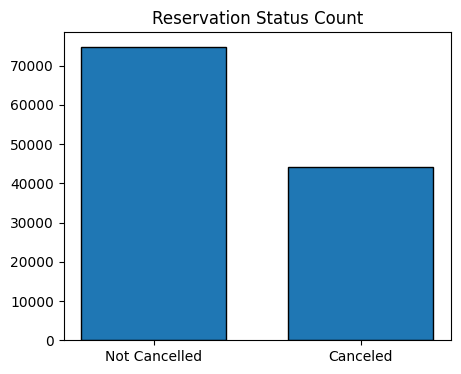

In [71]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','Canceled'],df['is_canceled'].value_counts(),edgecolor = 'k',width = 0.7)

Reservation Status in different Hotels

Text(0, 0.5, 'Number Of Reservations')

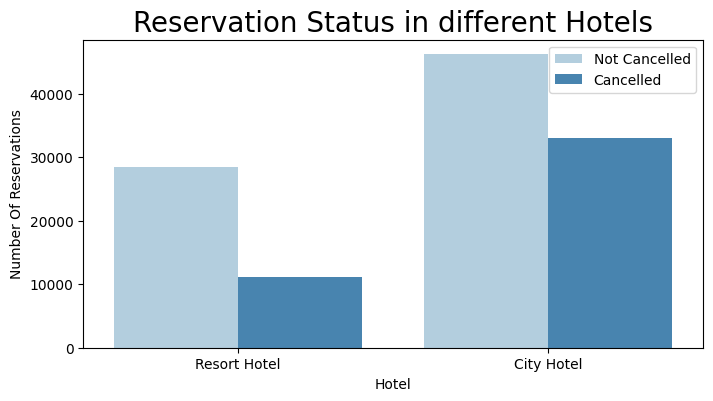

In [72]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
plt.title('Reservation Status in different Hotels',size=20)
plt.legend(['Not Cancelled','Cancelled'])
plt.xlabel('Hotel')
plt.ylabel('Number Of Reservations')


Average Daily Rate Of Reservation in Resort Hotel And City Hotel

In [119]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [74]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [75]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

Month wise reservation Cancellation and Non Cancellation

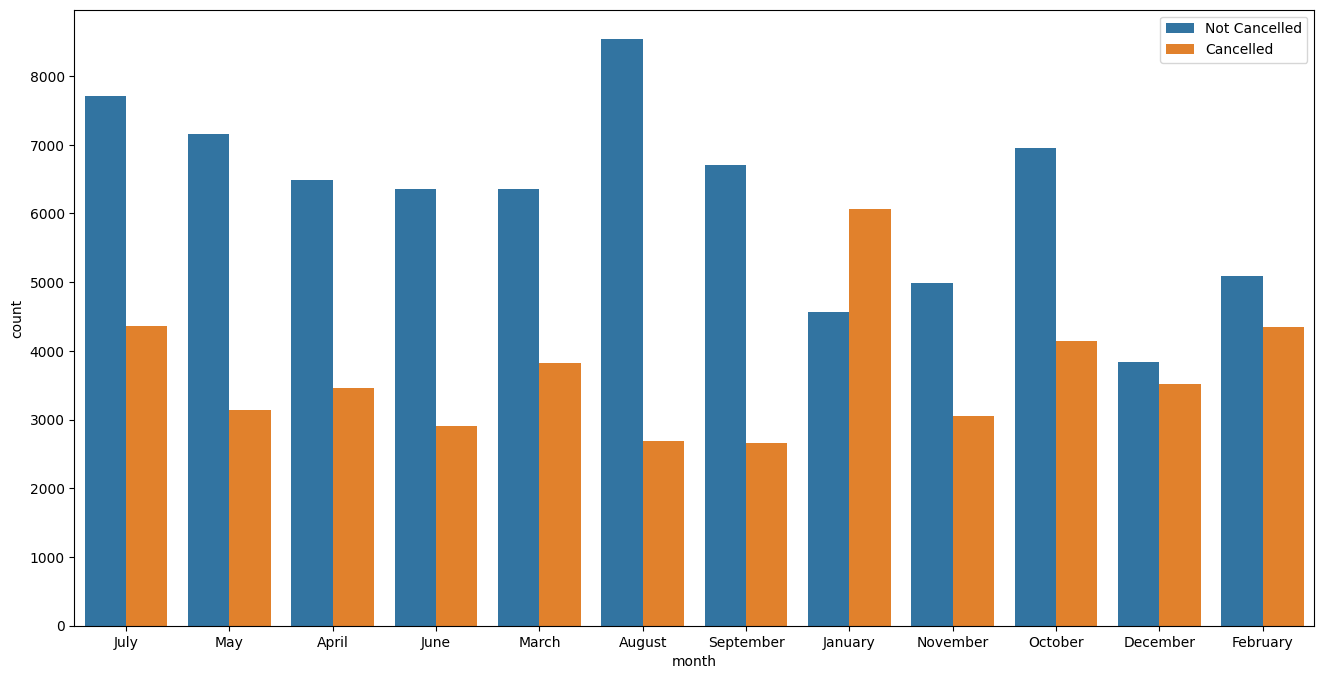

In [77]:
df['month'] = df['reservation_status_date'].dt.month_name()
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month',hue='is_canceled',data=df)
plt.legend(['Not Cancelled','Cancelled'])
plt.show()


ADR Per Month

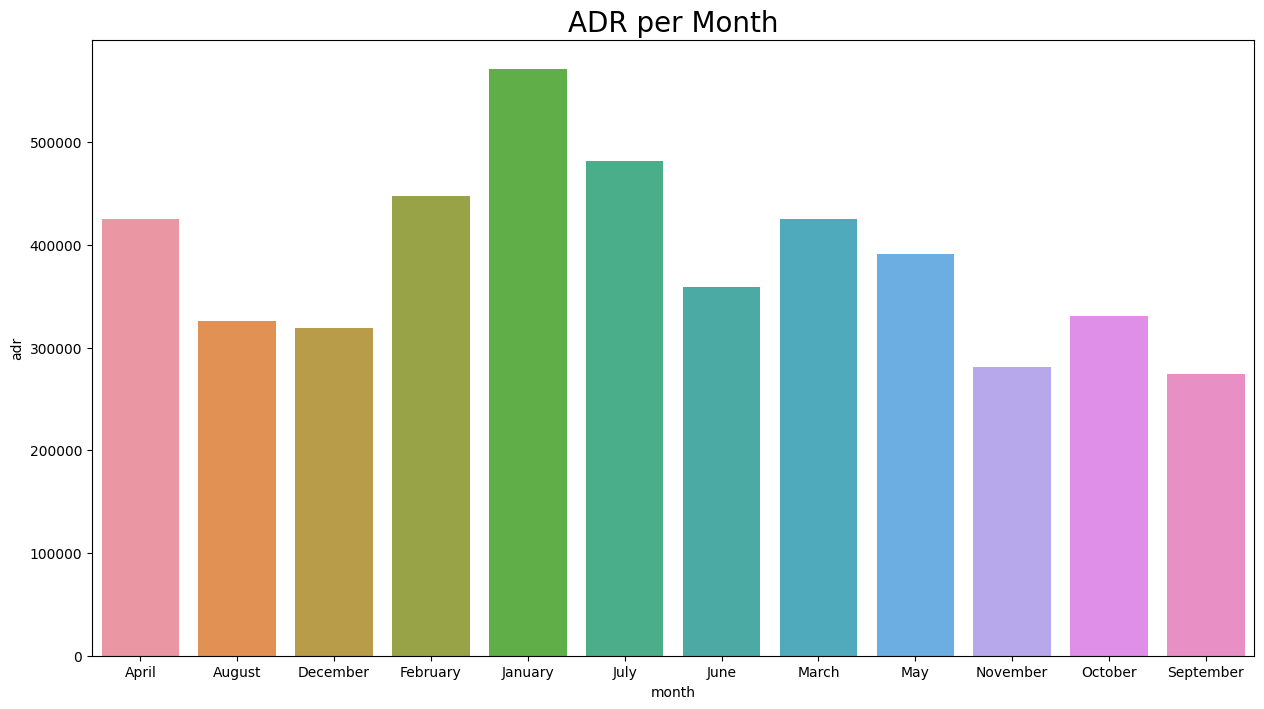

In [83]:
plt.figure(figsize=(15,8))
plt.title('ADR per Month',fontsize=20)
sns.barplot(x='month',y='adr',data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

Top 10 Countries With Reservation Cancellation

In [105]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[0:10]

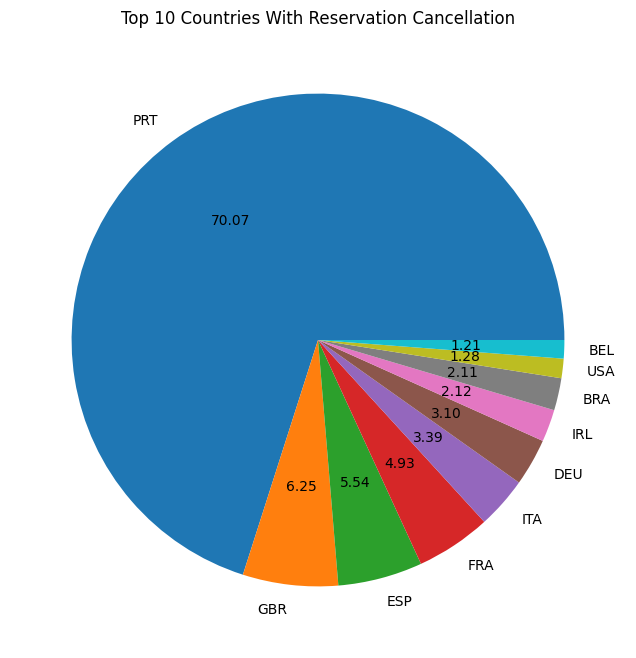

In [106]:
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries With Reservation Cancellation')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [107]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [108]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

Average Daily Rate

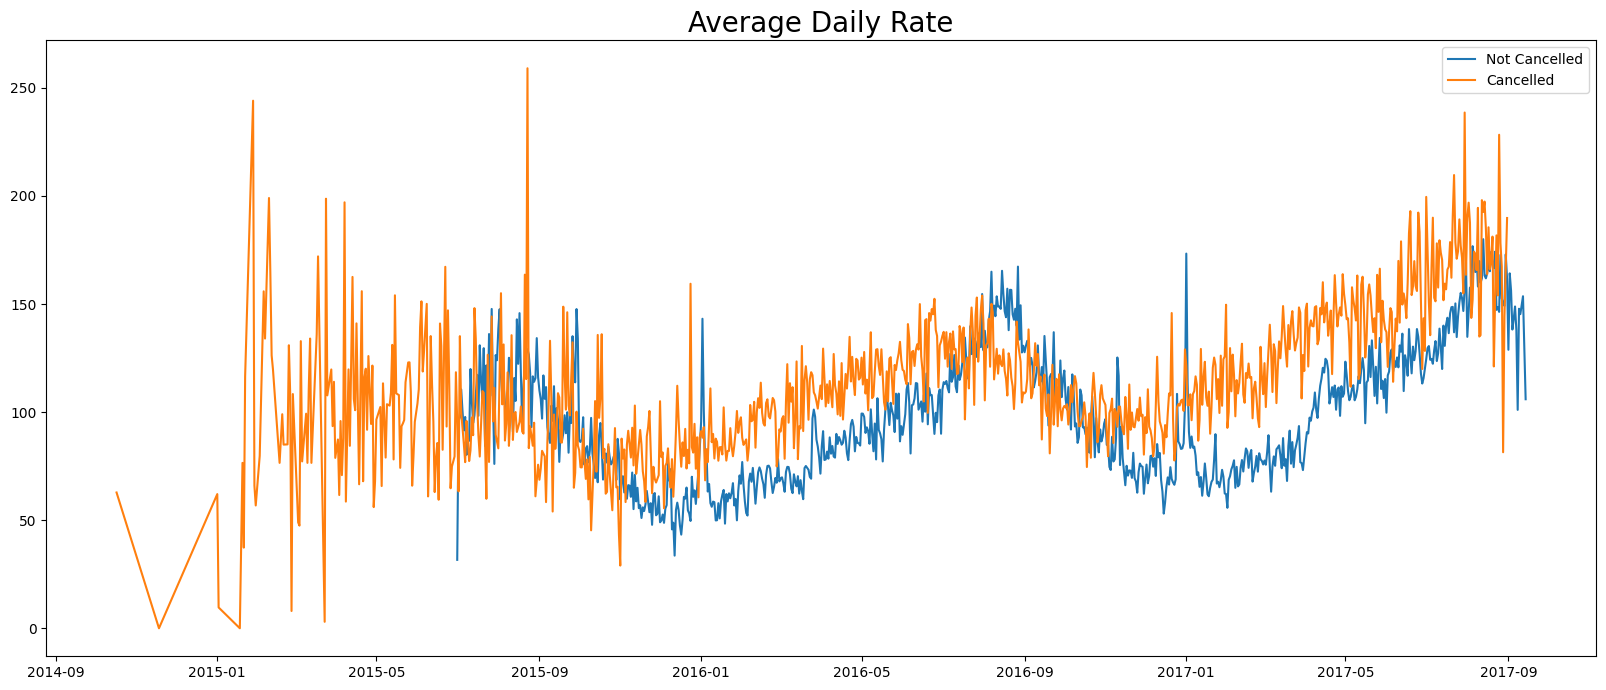

In [112]:
cancelled_data = df[df['is_canceled']==1]
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate',fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='Cancelled')
plt.legend()
plt.show()

From above chart we can see there is no data for Cancelled Reservations before 2015-05.Therefore we will filter data from 2015-09 to 2017-09

In [110]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>='2015-09')&(cancelled_df_adr['reservation_status_date']<='2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>='2015-09')&(not_cancelled_df_adr['reservation_status_date']<='2017-09')]


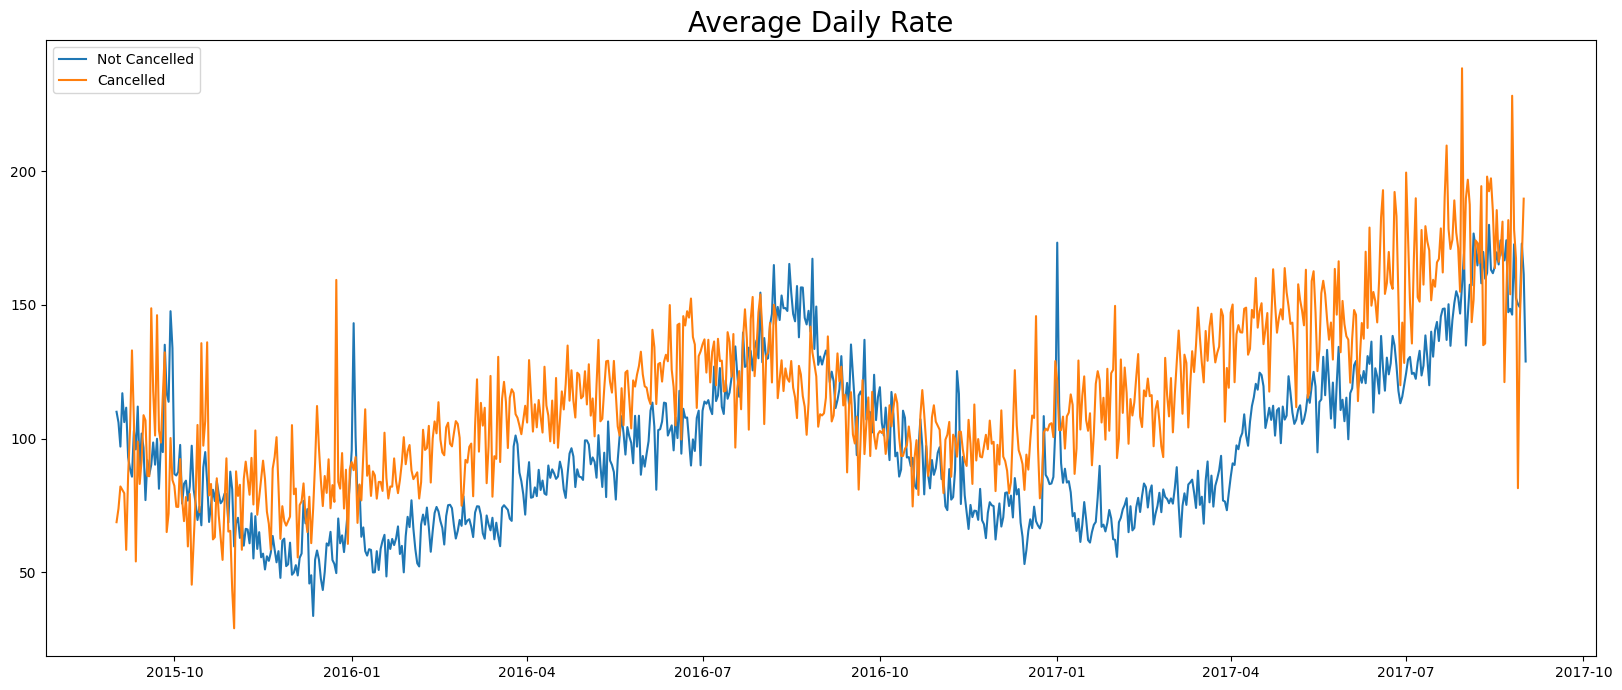

In [111]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate',fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label="Cancelled")
plt.legend()
plt.show()

# Conclusion

---
1. City Hotels are having more cancellation compared to Resort Hotels.
 * This may be due to High Cost of reservation and may be
due to bad mentainance.
2. Top 10 Countries With Reservation Cancellation.
 * Portugal(PTR) is having highest number of cancellation
   approx 70% of cancellation were happened in hotels whih are in this country.
 * Followed by United Kingdom(GBR),Spain(ESP),France(FRA),Itali(ITA),Germany(DEU),Irland(IRL),Brazil(BRA),United States Of America(USA) and Belgium(BeEL).
3. Market Segmentation Which bring more number of Reservations.
 * Over 47% of reservations are done through Online TA and 20% of reservation are done through Offline TA.
4. Which reservations are cancelling more.
 * But most of reservations cancelled are from Online TA  
   only, this may be due to bad maintainance of Hotels and showing facilities which are not there in hotel in real.
 * There are more cancellation occuring which reservation are done through Group and Offline TA.
5. Rate Of Reservation.
 * We can observe that there are more cancellation occuring when price is higher.